In [1]:
import time
t0 = time.time()
K_MAX = 100
R_MAX = 1024
Z_MAX = 1024

%run GenerateParameters.ipynb

Generating cache table of size 1024x1024x100 (~26.6 bits)...


  0%|          | 0/1023 [00:00<?, ?it/s]

Done. Table generation took 3.7 seconds


In [2]:
print('Computing lower bound...')
t1 = time.time()
l = 1.79
dist = stats.geom(0.23).pmf(np.arange(Z_MAX // 2))
rd = RunDistribution(dist, l)
print(f'{rd.compute_lower_bound(True) / l=}')
print('This took %.1f seconds' % (time.time() - t1))

Computing lower bound...
zero_term=3.074396967682555
first_term=-8.500122295414988
second_term=4.948903971048484
last_terms=1.175260980330965
combined_arl=4.748671673416195
rd.compute_lower_bound(True) / l=0.11854363341800714
This took 1.3 seconds


In [7]:
print('Computing lower bound...')
t1 = time.time()
l = 1.
dist = stats.geom(0.13).pmf(np.arange(Z_MAX // 2))
rd = RunDistribution(dist, l)
print(f'{rd.compute_lower_bound(True) / l=}')
print('This took %.1f seconds' % (time.time() - t1))

Computing lower bound...
zero_term=3.1218503959391226
first_term=-8.856261106046343
second_term=0.0
last_terms=6.45339817441609
combined_arl=8.856261106046343
rd.compute_lower_bound(True) / l=0.11712387844025579
This took 1.7 seconds


In [8]:
l = 0.1
beta = 3.8275862068965516
g = 0.017394360263928998
D_j = np.exp(-l * np.arange(Z_MAX // 2))
dist = np.exp(-beta*D_j) * ((1 - g) ** (l * np.arange(Z_MAX // 2))) / np.sqrt(np.arange(Z_MAX // 2))
dist[0] = 0.0
dist = dist / np.sum(dist)
rd = RunDistribution(dist, l)

/tmp/ipykernel_3052/386977032.py:5: RuntimeWarning: divide by zero encountered in true_divide
  dist = np.exp(-beta*D_j) * ((1 - g) ** (l * np.arange(Z_MAX // 2))) / np.sqrt(np.arange(Z_MAX // 2))


In [9]:
print(f'{rd.average_length=}')
print(f'{rd.D=}')

rd.average_length=172.09091481023125
rd.D=0.025457441004583015


In [10]:
print('Computing lower bound...')
t1 = time.time()
print(f'{rd.compute_lower_bound(True) / l=}')
print('This took %.1f seconds' % (time.time() - t1))

Computing lower bound...
zero_term=3.8310126210622197
first_term=-18.108178805792647
second_term=-41.69562257948887
last_terms=57.071620351457774
combined_arl=181.08178805792647
rd.compute_lower_bound(True) / l=0.0875449098820465
This took 1.2 seconds


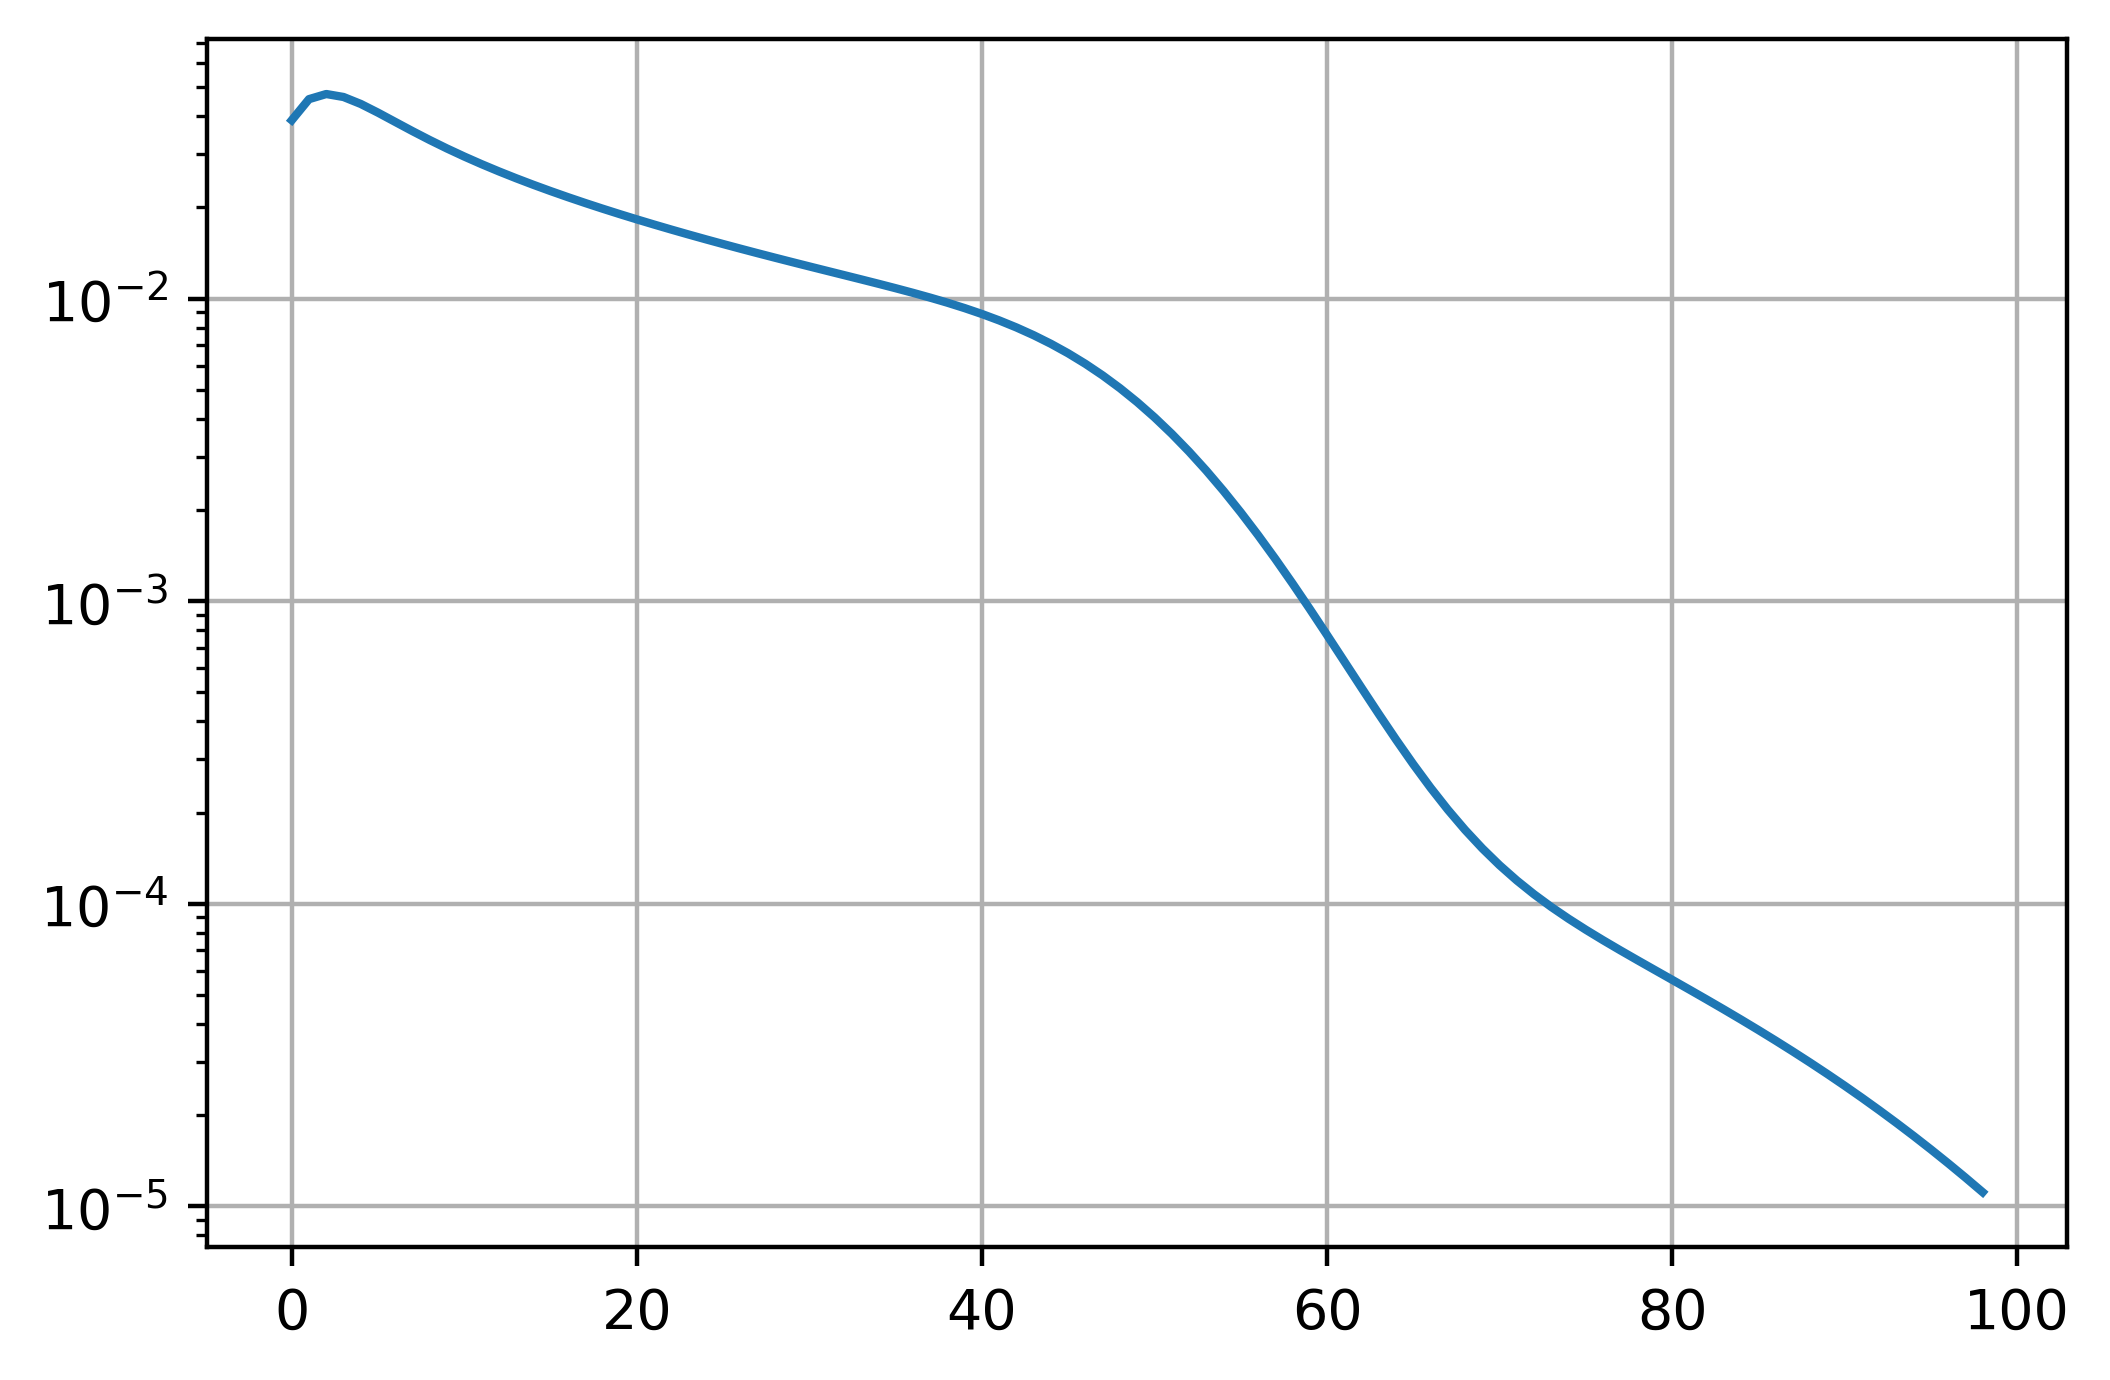

In [11]:
f = plt.figure(dpi = 400)
plt.plot(rd.k_dist[1:])
plt.yscale('log')
plt.grid()

In [12]:
np.sum(rd.k_dist)

0.999917659345107